# Metropolis Hastings

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

Shows you how to use the Metropolis Hastings MCMC sampler.

## Circle

In [2]:
def likelihood(theta, radius=1.):
    r = np.sqrt(np.sum(np.power(theta.numpy(), 2)))
    p_theta = float(r < radius)
    
    return p_theta

In [3]:
from cag.sampler.transition import UniformTransitionDistribution

min = torch.tensor([-1, -1]).float()
max = torch.tensor([1, 1]).float()
transition = UniformTransitionDistribution(min, max)

In [4]:
from cag.sampler import MetropolisHastings

mcmc = MetropolisHastings(likelihood, transition)

In [5]:
from torch.distributions.uniform import Uniform

initializer = Uniform(min, max)
num_samples = 10000
samples = mcmc.sample(initializer, num_samples).squeeze()

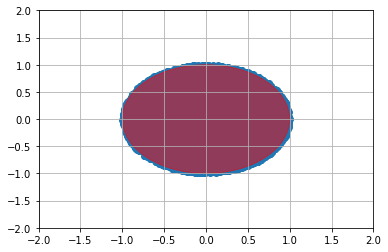

In [6]:
# Show the true circle.
circle = plt.Circle((0, 0), 1., color='r', alpha=.5)
fig, ax = plt.subplots()
ax.add_artist(circle)
# Show the sampled data.
D = samples.numpy()
x = D[:, 0]
y = D[:, 1]
plt.scatter(x, y)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid(True)
plt.show()

## Normal

In [7]:
from torch.distributions.normal import Normal

mu = 0
sigma = 1
normal = Normal(torch.tensor(mu).float(), torch.tensor(sigma).float())
def likelihood(theta):
    return normal.log_prob(theta).exp()

In [8]:
from cag.sampler.transition import UniformTransitionDistribution

min = torch.tensor(-10).float()
max = torch.tensor(10).float()
transition = UniformTransitionDistribution(min, max)

In [9]:
from cag.sampler import MetropolisHastings

mcmc = MetropolisHastings(likelihood, transition)

In [10]:
from torch.distributions.uniform import Uniform

initializer = Uniform(min, max)
num_samples = 100000
samples = mcmc.sample(initializer, num_samples).squeeze()

/home/joeri/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


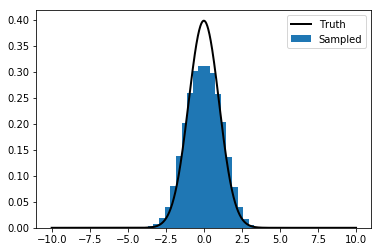

In [11]:
plt.hist(samples.numpy(), bins=25, density=True, label="Sampled")
x = np.linspace(float(min), float(max), 1000)
plt.plot(x, mlab.normpdf(x, float(mu), float(sigma)), lw=2, c='black', label="Truth")
plt.legend()
plt.show()